In [39]:
import pandas as pd
import numpy as np

#Machine Learning
from sklearn.preprocessing import StandardScaler

# Libraries pour CAH
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

#Visualisation
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 8)
plt.rcParams['figure.titlesize'] = 30
plt.rcParams['font.size'] = 20

<h1 align='center'>Exemple d'Etude: La Classification des Fromages</h1>

## Compréhension des données

### Import des donnees

In [40]:
fro = pd.read_csv('./fromage.txt', sep='\t')
fro.head()

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


### Statistiques descriptives

In [41]:
fro.describe()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
std,91.914356,108.678923,72.528882,8.129642,24.163098,11.723339,6.959788,28.245755,11.318388
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
25%,292.000000,140.000000,132.900000,23.400000,51.600000,4.900000,17.800000,70.000000,20.000000
50%,321.000000,223.000000,202.300000,26.300000,62.300000,6.400000,21.000000,80.000000,26.000000
75%,355.000000,276.000000,220.500000,29.100000,76.400000,21.100000,23.400000,90.000000,30.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


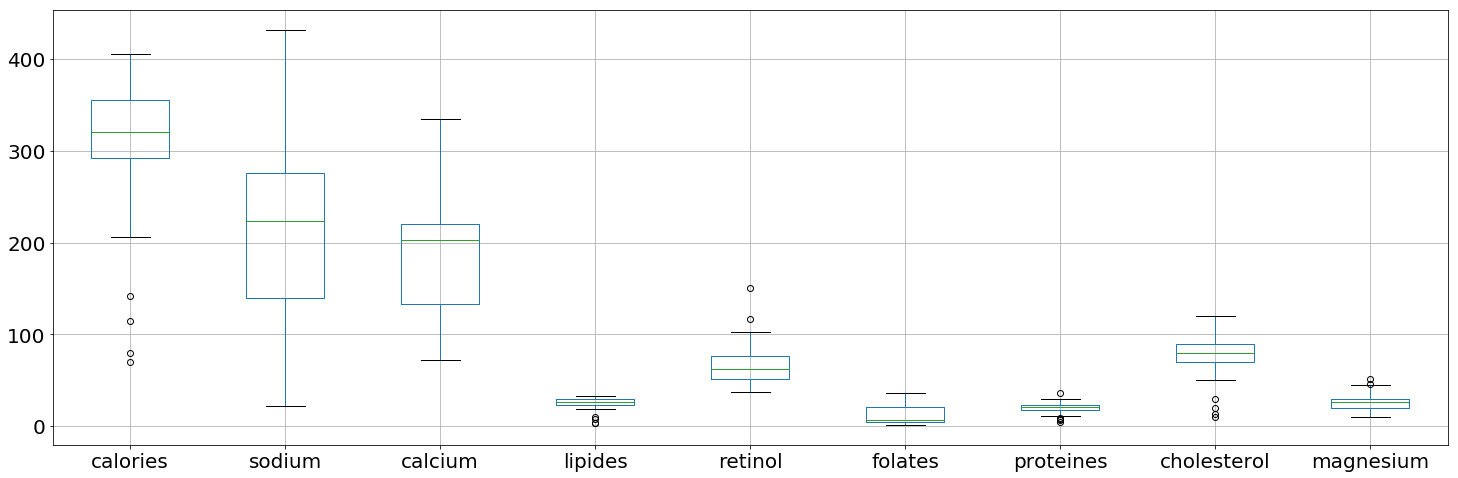

In [42]:
fro.boxplot()
plt.show()

### Relations des variables

In [43]:
fro.corr()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,1.000000,0.447224,0.433400,0.983634,-0.042885,-0.321098,0.885372,0.961923,0.745443
sodium,0.447224,1.000000,0.005959,0.483344,0.144328,0.136561,0.275998,0.332994,0.031113
calcium,0.433400,0.005959,1.000000,0.341132,-0.289547,-0.637503,0.610705,0.428446,0.710480
lipides,0.983634,0.483344,0.341132,1.000000,-0.018353,-0.276543,0.809303,0.955444,0.689860
retinol,-0.042885,0.144328,-0.289547,-0.018353,1.000000,0.517266,-0.039173,-0.086972,-0.099801
folates,-0.321098,0.136561,-0.637503,-0.276543,0.517266,1.000000,-0.352871,-0.366346,-0.447067
proteines,0.885372,0.275998,0.610705,0.809303,-0.039173,-0.352871,1.000000,0.817138,0.787777
cholesterol,0.961923,0.332994,0.428446,0.955444,-0.086972,-0.366346,0.817138,1.000000,0.752453
magnesium,0.745443,0.031113,0.710480,0.689860,-0.099801,-0.447067,0.787777,0.752453,1.000000


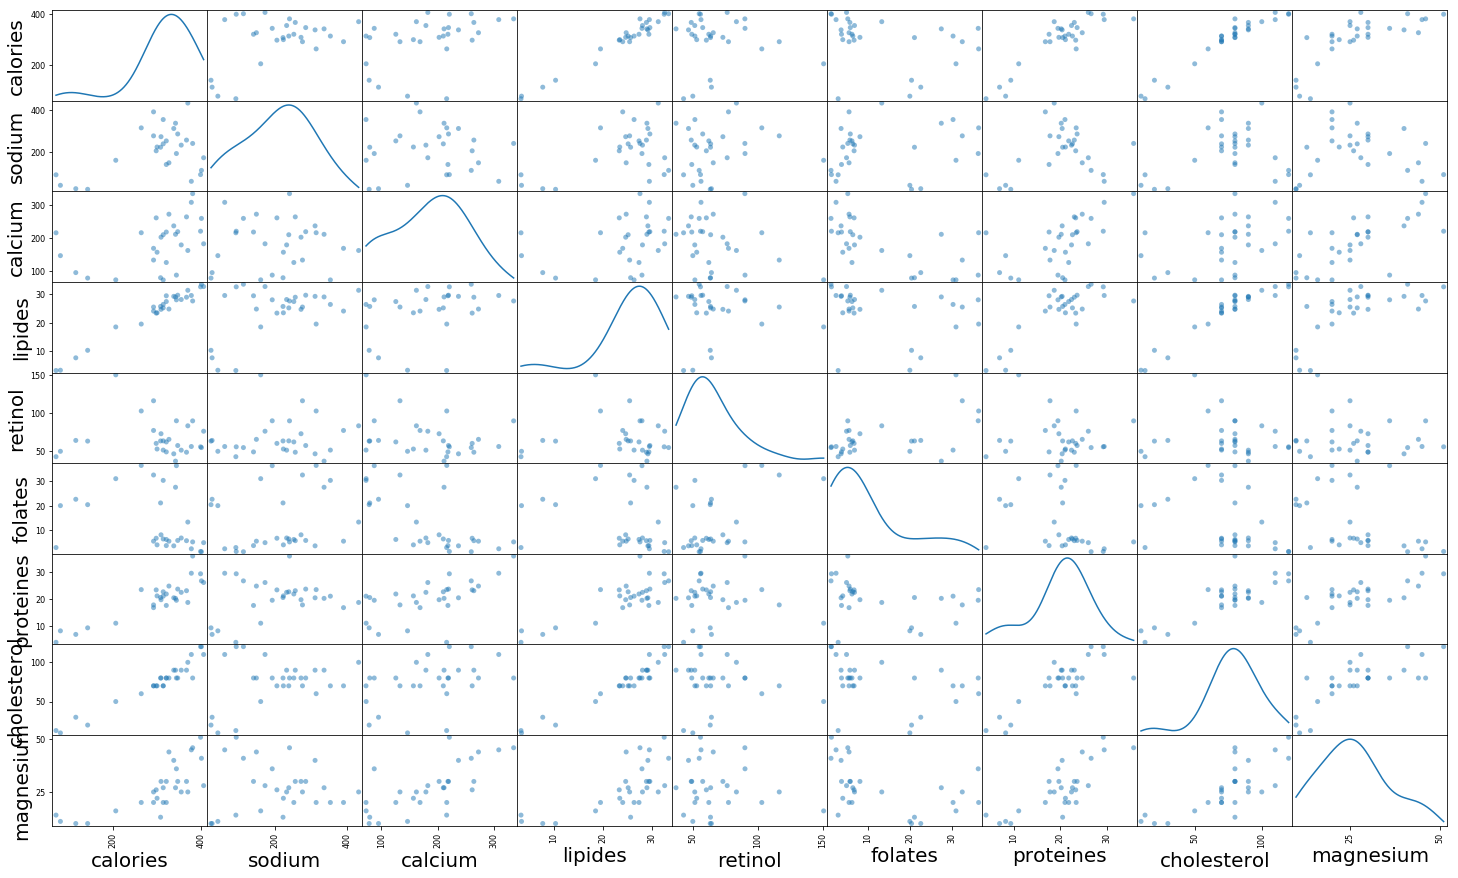

In [44]:
pd.plotting.scatter_matrix(fro,figsize=(25,15),s=100, diagonal='kde')
plt.show()

## Classification Ascendante Hierarchisée

### Centrer et reduire les donnees

In [45]:
scaler = StandardScaler()
s = scaler.fit_transform(fro.loc[:,'calories':'magnesium'])
fro.loc[:,'calories':'magnesium'] = s
fro.head()
fro.set_index('Fromages',inplace=True)
fro.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,0.154630,1.342968,-1.587464,0.268066,-0.672290,1.500911,0.121519,-0.165242,-0.626309
Babybel,0.154630,0.261393,0.337679,0.117846,-0.162662,-0.573843,0.355480,-0.165242,0.003101
Beaufort,1.117917,-0.918507,1.033649,1.144354,-0.533301,-1.025253,0.940383,1.636269,1.261920
Bleu,0.464654,1.179093,0.355920,0.593544,-1.283000,1.257844,0.004538,0.555362,0.003101
Camembert,-0.398983,0.973078,0.423272,-0.583184,1.492574,2.030451,0.472461,-0.525544,-0.626309


### Matrice des liens

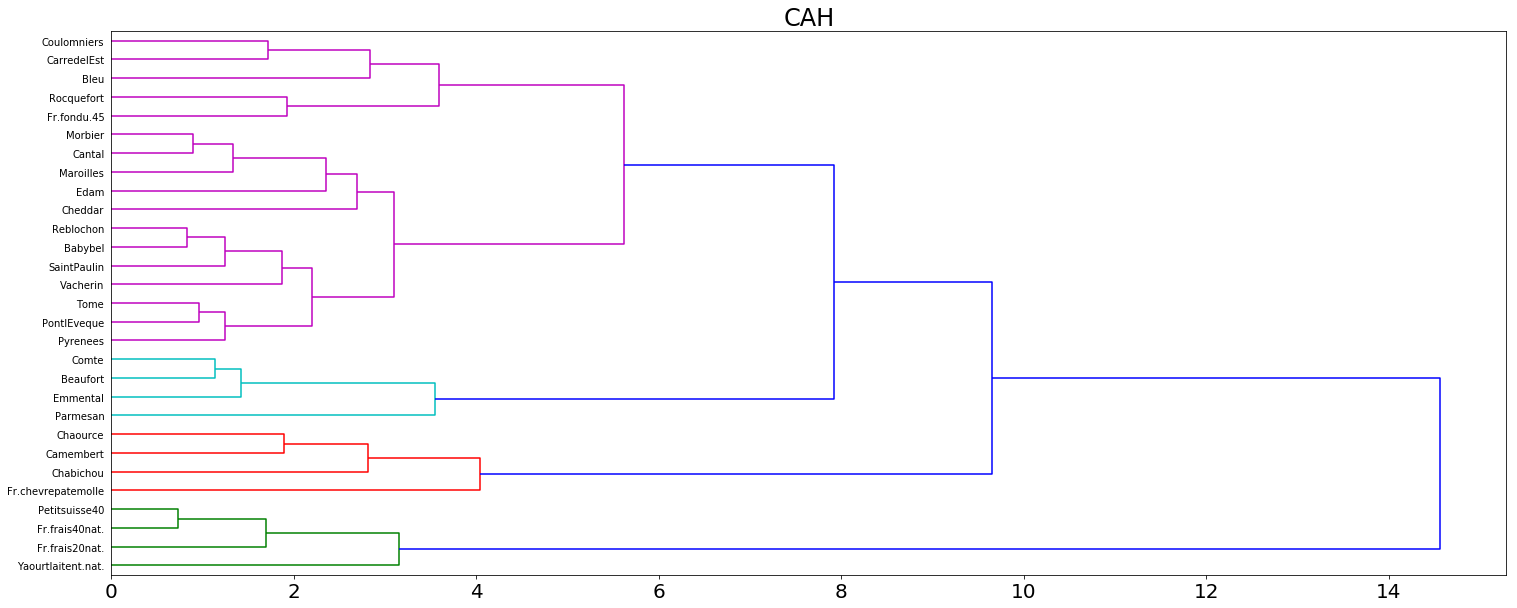

In [46]:
mat = linkage(fro, method='ward', metric='euclidean')
plt.figure(figsize=(25,10))
plt.title("CAH")
dendrogram(mat,labels=fro.index,orientation='right', color_threshold=7)
plt.show()

In [47]:
groupes_cah= fcluster(mat,t=7,criterion='distance')
print(groupes_cah)
fro['groupe']=groupes_cah
fro.head()
fro[['groupe']].sort_values(by='groupe')

[4 4 3 4 2 4 2 2 4 3 4 4 3 2 4 1 1 4 4 3 1 4 4 4 4 4 4 4 1]


,groupe
Fromages,
Yaourtlaitent.nat.,1
Fr.frais20nat.,1
Petitsuisse40,1
Fr.frais40nat.,1
Fr.chevrepatemolle,2
Camembert,2
Chabichou,2
Chaource,2
Emmental,3


## Le Clustering non-hierarchique avec K-means

In [48]:
from sklearn.cluster import KMeans
# Entrainement 
kmeans = KMeans(n_clusters=4).fit(s)
kmeans.labels_
# Affichage dans un tableau
frok = fro.copy()
frok['groupe']=kmeans.labels_
frok[['groupe']].sort_values(by='groupe')

,groupe
Fromages,
Beaufort,0
Parmesan,0
Comte,0
Edam,0
Emmental,0
CarredelEst,1
Camembert,1
Chabichou,1
Chaource,1


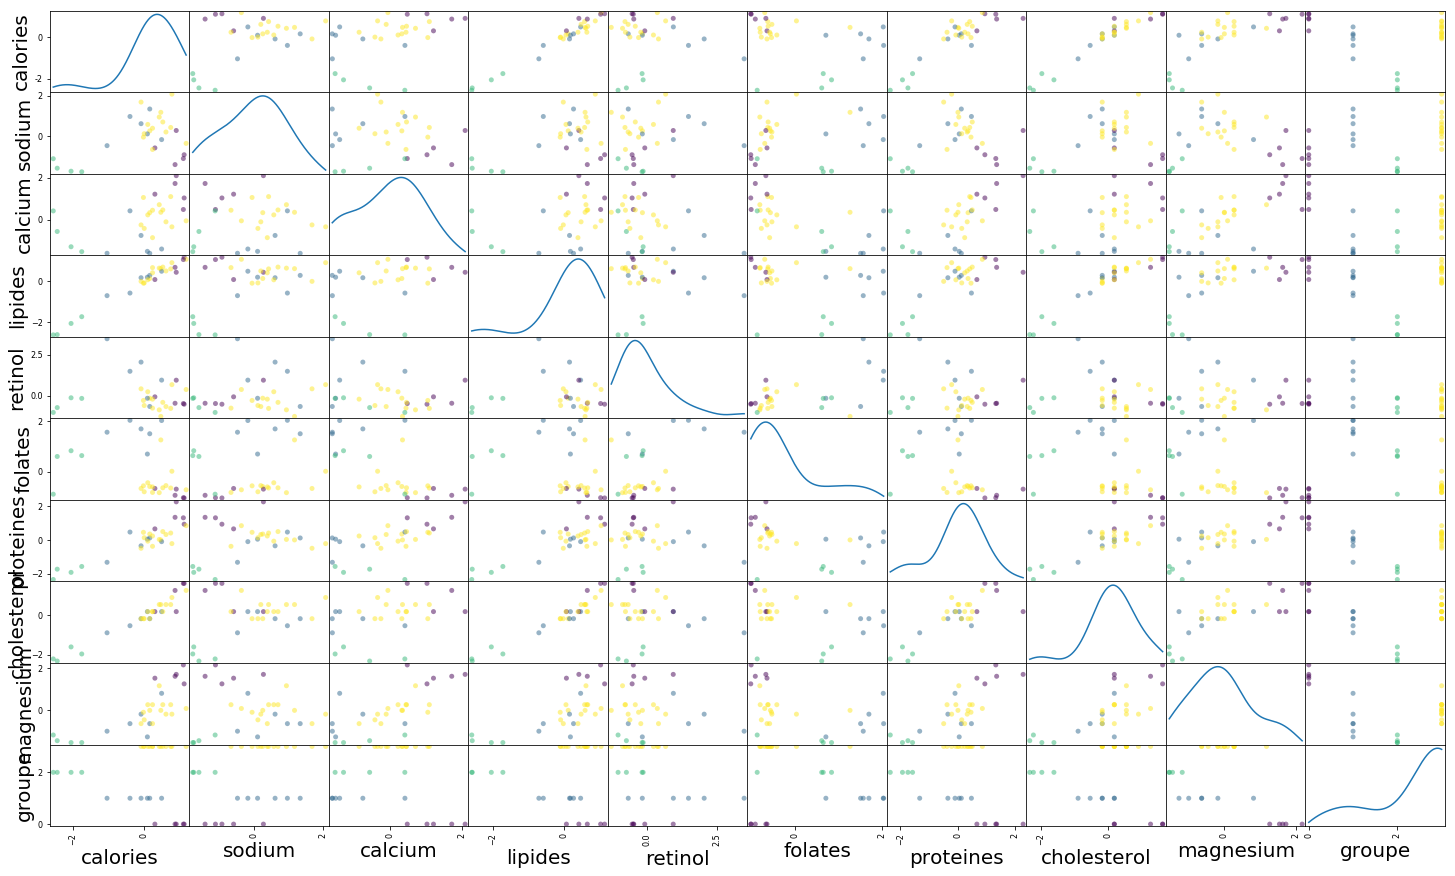

In [49]:
pd.plotting.scatter_matrix(frok,figsize=(25,15),s=100, diagonal='kde',c=frok.groupe.astype('int'),label=frok.groupe.astype('int'))
plt.show()

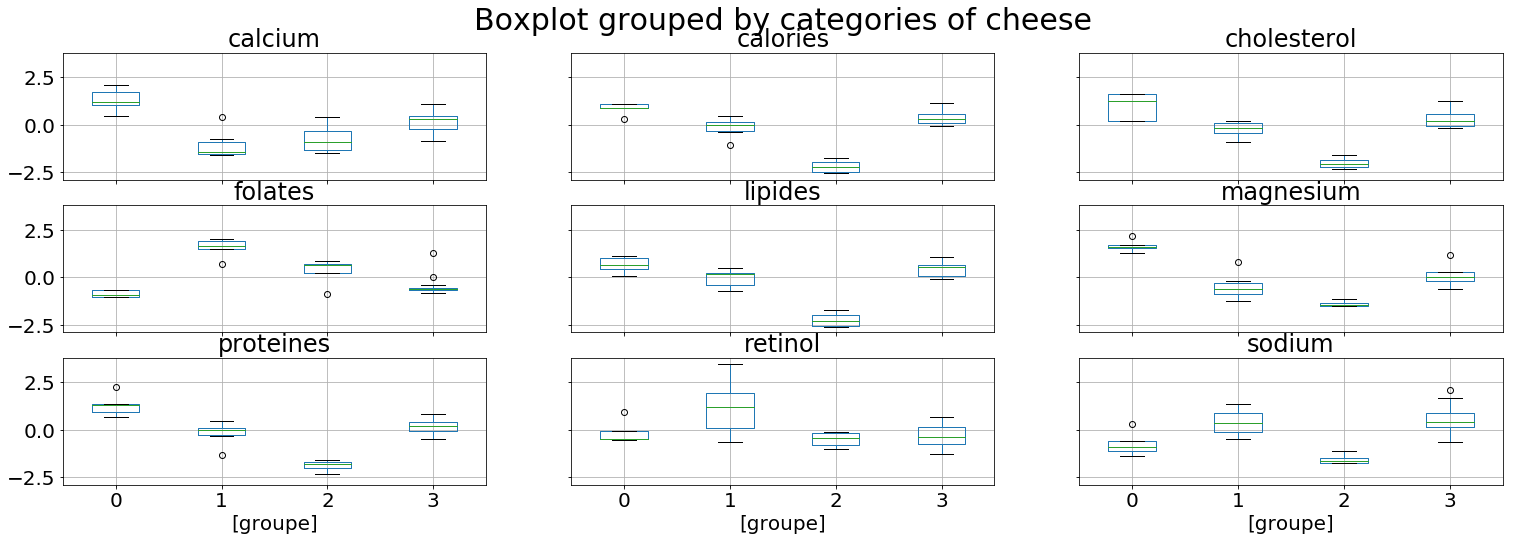

In [50]:
frok.boxplot(by='groupe')
plt.suptitle('Boxplot grouped by categories of cheese')
plt.show()

In [51]:
pd.crosstab(groupes_cah,kmeans.labels_+1)

col_0,1,2,3,4
row_0,,,,
1,0,0,4,0
2,0,4,0,0
3,4,0,0,0
4,1,2,0,14


Le groupe numéro 3 est le seul identique pour les deux méthodes

## Recherche du nombre adéquat de groupes

[ 1.09577285 -1.10579298  0.48781786  1.03168817 -0.4911826  -1.01657248
  1.32057019  1.63626853  2.16107669]
0.4862625516965649
0.36025261136085507
0.3454007305864028
0.29684146369823283
0.30879441441275335
0.31482664070318517
0.30564796856184484
0.26874161244126477
0.26463009310670266


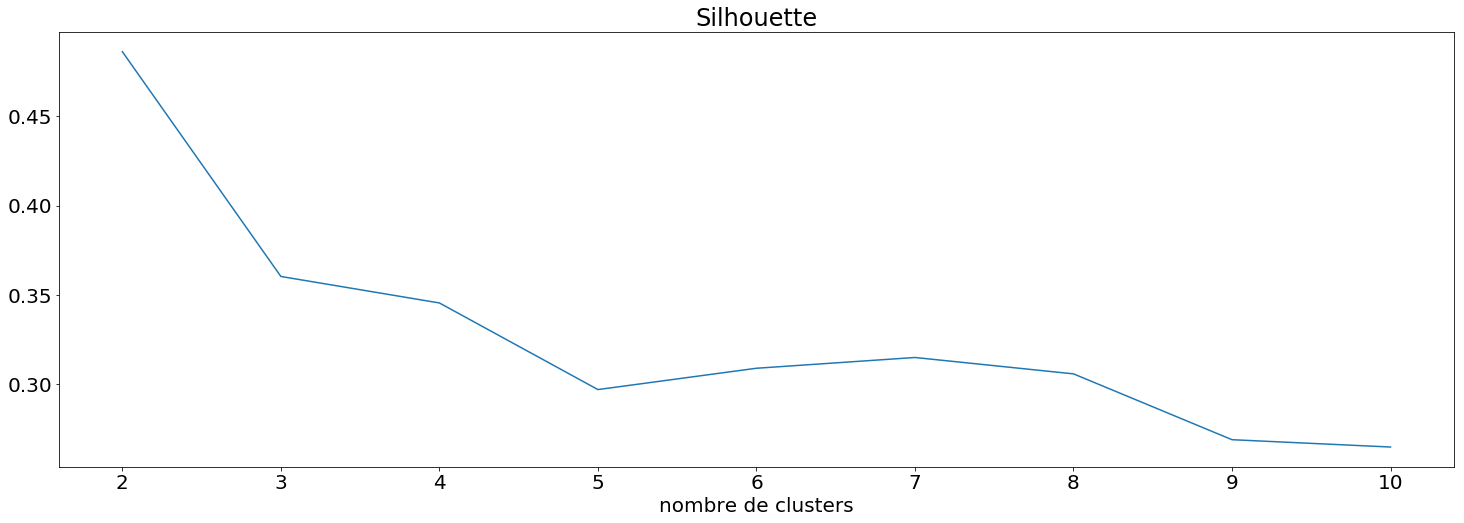

In [52]:
from sklearn import metrics

s1 = scaler.fit_transform(fro.loc[:,'calories':'magnesium'])
print(s1[9])

#Tester le silhouette score en faisant varier le nombre de clusters de 2 a 10
testSil1 = np.arange(9, dtype='double')
for i in np.arange(9):
    km = KMeans(n_clusters=i+2,random_state=1)
    km.fit(s1)
    testSil1[i] = metrics.silhouette_score(s1,km.labels_ ,random_state=1)
    print(testSil1[i])
    
plt.plot(np.arange(2,11),testSil1)
plt.title('Silhouette')
plt.xlabel('nombre de clusters')
plt.show()    

In [53]:
from sklearn import metrics
from sklearn import preprocessing

s2 = preprocessing.scale(fro.loc[:,'calories':'magnesium'])
#Tester le silhouette score en faisant varier le nombre de clusters de 2 a 10
testSil = np.arange(9, dtype='double')
for i in np.arange(9):
    km1 = KMeans(n_clusters=i+2,random_state=1)
    km1.fit(s2)
    testSil[i] = metrics.silhouette_score(s2,km1.labels_,random_state=1, metric='euclidean' )
    
(s1 == s2).all()

True

Les fonctions scale et StandartScaler retournent les memes valeurs

In [70]:
frok.sort_values(by='groupe')

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,groupe
Fromages,,,,,,,,,,
Beaufort,1.117917,-0.918507,1.033649,1.144354,-0.533301,-1.025253,0.940383,1.636269,1.261920,0
Parmesan,0.896472,0.280121,2.088830,0.418287,0.945040,-0.678014,2.271038,0.195060,1.711498,0
Comte,1.095773,-1.105793,0.487818,1.031688,-0.491183,-1.016572,1.320570,1.636269,2.161077,0
Edam,0.298569,-0.581393,1.213255,0.067772,-0.078427,-0.651971,0.662554,0.195060,1.531667,0
Emmental,0.863255,-1.405450,1.718394,0.656136,-0.474335,-0.921082,1.349815,1.275966,1.621583,0
CarredelEst,0.154630,1.342968,-1.587464,0.268066,-0.672290,1.500911,0.121519,-0.165242,-0.626309,1
Camembert,-0.398983,0.973078,0.423272,-0.583184,1.492574,2.030451,0.472461,-0.525544,-0.626309,1
Chabichou,0.486798,-0.169364,-1.382602,0.468361,0.949252,2.021770,-0.097820,0.195060,0.812342,1
Chaource,-0.088960,0.617236,-0.741355,0.155401,2.056954,1.691893,-0.346404,-0.165242,-0.176731,1


## Interpretation des classes

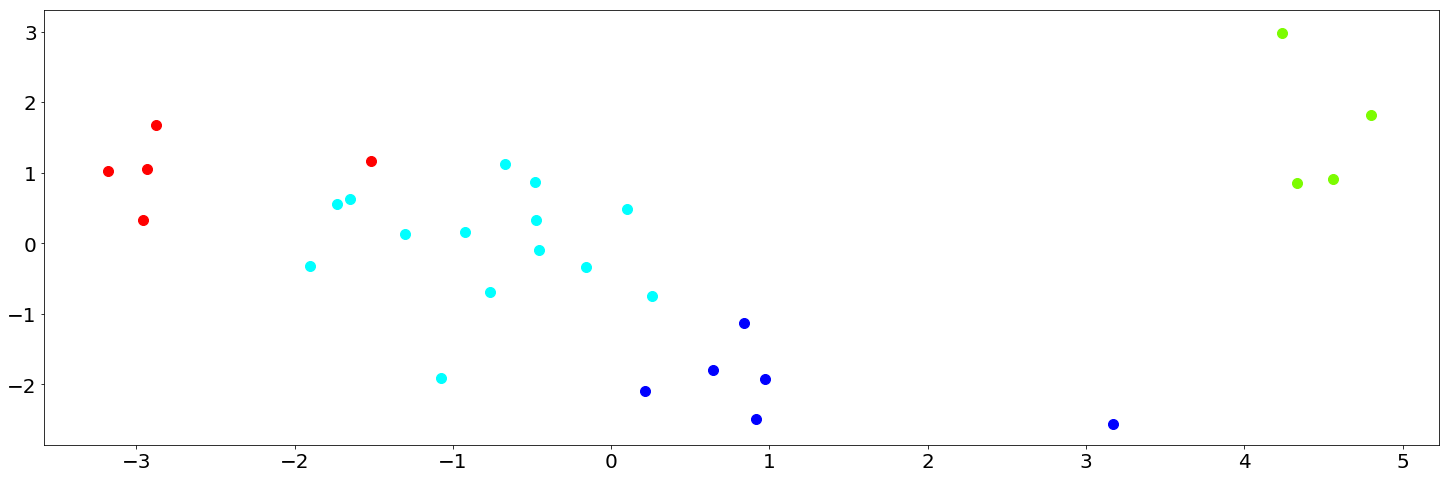

In [68]:
#ACP
#Principal Component analysis 
from sklearn.decomposition import PCA
#Permet de réduire les dimensions
acp= PCA(n_components=2).fit_transform(s2)
#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip()dans la boucle
for couleur,k in zip(['red','blue','lawngreen','aqua'],[0,1,2,3]):
    plt.scatter(acp[kmeans.labels_==k,0],acp[kmeans.labels_==k,1],c=couleur, s=100)
plt.show()  

On remarque que le cluster numero 3 est tres loin des autres cluster. Cela peut expliquer que le meilleur score soit 2. 
Pour améliorer la classification, il convient d'isoler ce groupe pour éviter qu'il n'écrase les autres.

## Classifiaction sans les fromages frais

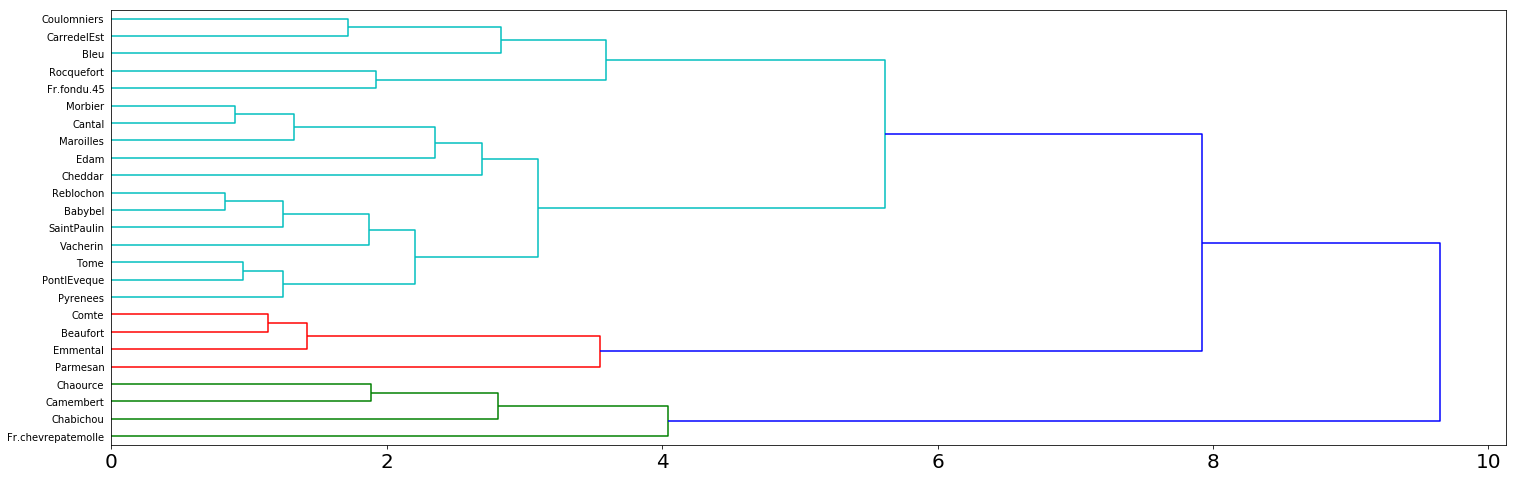

In [57]:
#Suppression des fromages frais du df puis du groupe
fro_sf = frok[frok.groupe != 2].copy()

# CAH
# Centrer et reduire les donnees
s_fro_sf = preprocessing.scale(fro_sf.loc[:,'calories':'magnesium'])
# Matrice de liens
m_fro_sf = linkage(fro_sf.loc[:,'calories':'magnesium'], method='ward',metric='euclidean')
# Afficher le dendrogramme
dendrogram(m_fro_sf,labels=fro_sf.index,orientation='right', color_threshold=6)
plt.show()

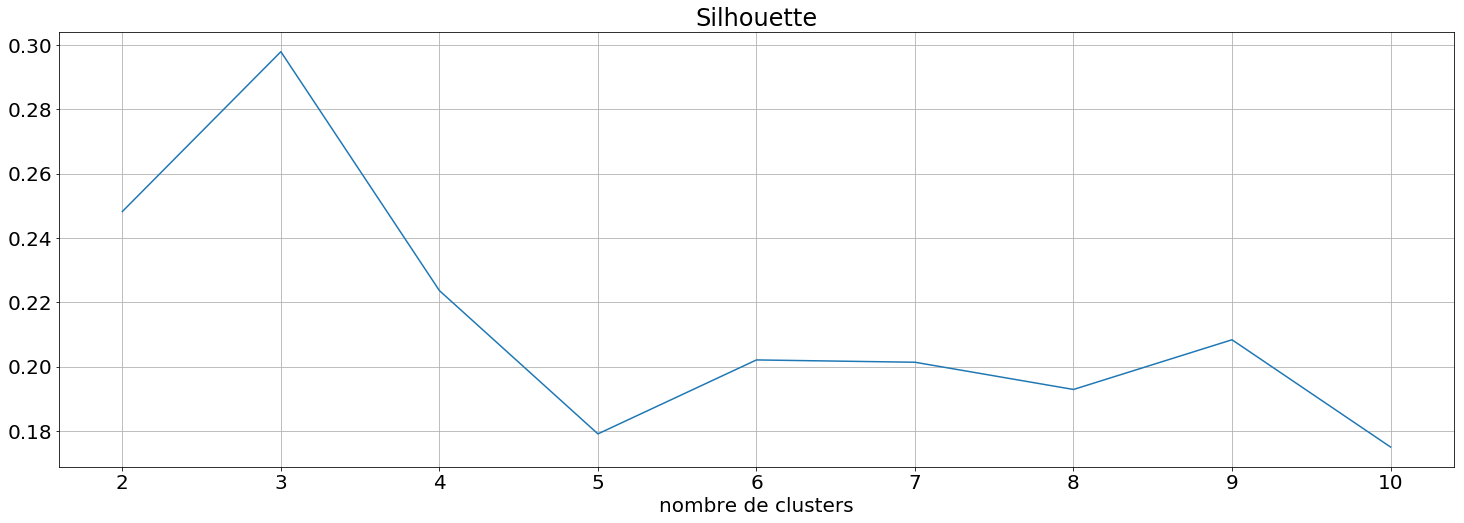

In [72]:
# Classification avec le KMeans
testSil = np.arange(9, dtype='double')
for i in np.arange(9):
    km = KMeans(n_clusters=i+2,random_state=1)
    km.fit(s_fro_sf)
    testSil[i] = metrics.silhouette_score(s_fro_sf,km.labels_,random_state=1, metric='euclidean' )

plt.plot(np.arange(2,11),testSil)
plt.grid(True)
plt.title('Silhouette')
plt.xlabel('nombre de clusters')
plt.show()    

In [73]:
# Comparaison des resultats
_km = KMeans(n_clusters=3,random_state=1)
_km.fit(s_fro_sf)

fc = fcluster(m_fro_sf,t=7,criterion='distance')
pd.crosstab(_km.labels_,fc)

col_0,1,2,3
row_0,,,
0,0,4,2
1,3,0,0
2,1,0,15


In [74]:
# Attribution des groupes aux fromages
#pd.set_option('mode.chained_assignment','warn')
fro_sf.loc[:,'groupe'] = fc
fro_sf.sort_values(by='groupe')

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium,groupe
Fromages,,,,,,,,,,
Camembert,-0.398983,0.973078,0.423272,-0.583184,1.492574,2.030451,0.472461,-0.525544,-0.626309,1
Chabichou,0.486798,-0.169364,-1.382602,0.468361,0.949252,2.021770,-0.097820,0.195060,0.812342,1
Chaource,-0.088960,0.617236,-0.741355,0.155401,2.056954,1.691893,-0.346404,-0.165242,-0.176731,1
Fr.chevrepatemolle,-1.041175,-0.469022,-1.584658,-0.708368,3.493177,1.561678,-1.326117,-0.885846,-0.985972,1
Emmental,0.863255,-1.405450,1.718394,0.656136,-0.474335,-0.921082,1.349815,1.275966,1.621583,2
Beaufort,1.117917,-0.918507,1.033649,1.144354,-0.533301,-1.025253,0.940383,1.636269,1.261920,2
Comte,1.095773,-1.105793,0.487818,1.031688,-0.491183,-1.016572,1.320570,1.636269,2.161077,2
Parmesan,0.896472,0.280121,2.088830,0.418287,0.945040,-0.678014,2.271038,0.195060,1.711498,2
SaintPaulin,-0.022526,-0.047629,1.056100,-0.107486,-0.301652,-0.547800,0.457838,-0.165242,-0.086815,3


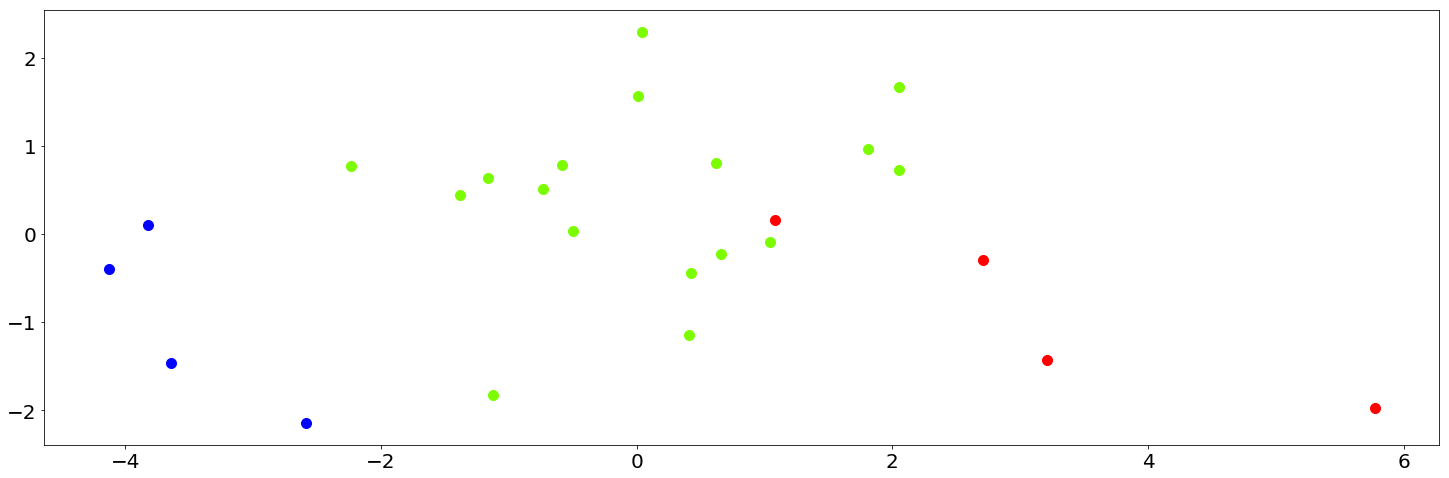

[[ 2.05178203  1.66370283]
 [ 0.42780251 -0.44325665]
 [-3.8211839   0.09758828]
 [ 0.00892199  1.56830757]
 [ 3.21325311 -1.42689604]
 [-1.38460257  0.44346247]
 [ 1.08219679  0.15526505]
 [ 2.70926222 -0.29314161]
 [-2.23876835  0.77545088]
 [-4.1244961  -0.40238263]
 [ 1.80954374  0.96287219]
 [-1.12475134 -1.82385701]
 [-3.6394696  -1.46321112]
 [ 5.77481277 -1.9748914 ]
 [ 2.05569286  0.72471654]
 [-1.16307615  0.63236874]
 [-0.73122055  0.51394608]
 [-2.58768802 -2.13803677]
 [ 1.03911573 -0.09617349]
 [-0.58519172  0.77669184]
 [ 0.65578944 -0.23126954]
 [ 0.04176237  2.28603633]
 [ 0.40615257 -1.14718365]
 [ 0.62335413  0.80791148]
 [-0.49899394  0.03197963]]


In [86]:
#Permet de réduire les dimensions
acp2= PCA(n_components=2).fit_transform(s_fro_sf)
#projeter dans le plan factoriel
#avec un code couleur différent selon le groupe
#remarquer le rôle de zip()dans la boucle
for couleur,k in zip(['red','blue','lawngreen'],[1,2,3]):
    plt.scatter(acp2[fc==k,0],acp2[fc==k,1],c=couleur, s=100)
plt.show()  
print(acp2)